In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

In [89]:
data =cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [90]:
def plt_show(image, title="", gray = False, size =(100,100)):
    temp = image
    if gray == False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        plt.title(title)
        plt.imshow(temp, cmap='gray')
        plt.show()

**Convert image to Gray Scale**

In [91]:
def detect_number(img):
    temp = img
    gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
    number = data.detectMultiScale(gray,1.2)
    print("number plate detected: "+str(len(number)))
    for numbers in number:
        (x,y,w,h) = numbers
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+h]
        cv2.rectangle(temp, (x,y), (x+w,y+h), (0,255,0), 3)
    plt_show(temp)

**Taking input Image of Car**

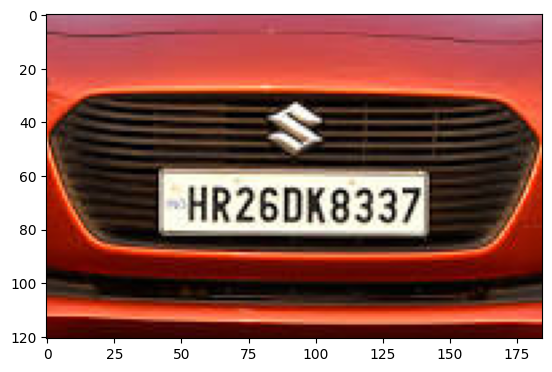

In [117]:
img = cv2.imread("car.jpeg")           #Input Image of Car
plt_show(img)
# detect_number(img)

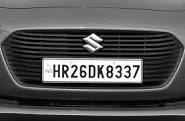

In [118]:
import cv2 as cv
from google.colab.patches import cv2_imshow
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

**Morphological Transform**

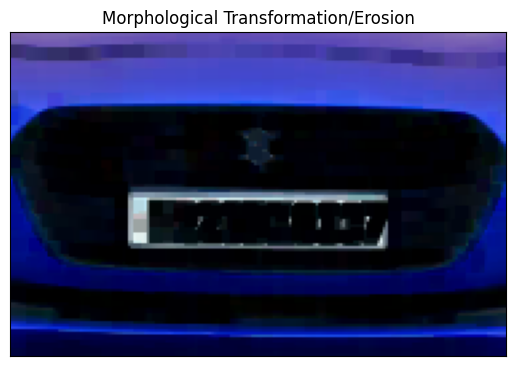

In [119]:
import numpy as np
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
plt.subplot(1,1,1), plt.imshow(erosion)
plt.title('Morphological Transformation/Erosion'), plt.xticks([]), plt.yticks([])
plt.show()

In [141]:
import imutils
image = img
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)


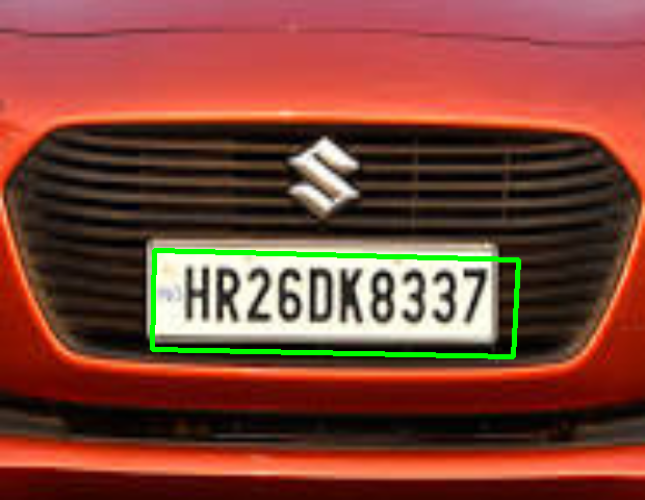

In [142]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)     #Applying gray scale
gray = cv2.GaussianBlur(gray, (5, 5), 0)           #Gaussian Blur
edged = cv2.Canny(gray, 75, 200)                   #Canny Edge Detection
cv2_imshow(image)

In [143]:
  cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
  screenCnt = None

In [144]:
for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)

        # if our approximated contour has four points, then
        # we can assume that we have found our screen
        print( len(approx) )
        if len(approx) == 4:
            screenCnt = approx
            break

4


In [145]:
if screenCnt is None:
        detected = 0
        print("No contour detected")
else:
        detected = 1

if detected == 1:
        cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)



In [136]:
mask = np.zeros(gray.shape,np.uint8)

new_image = cv2.drawContours(mask, [screenCnt], 0, 255, -1 ,)
new_image = cv2.bitwise_and(img, img, mask=mask)


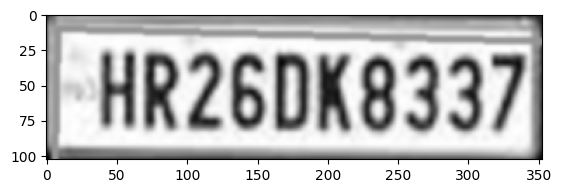

In [146]:
# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
plt.imshow(Cropped, cmap = 'gray');

**Using OCR**

In [147]:
!pip install easyocr

In [148]:
import matplotlib.pyplot as plt
import easyocr
import cv2
from IPython.display import Image


In [149]:
reader = easyocr.Reader(['en']);
output =reader.readtext(Cropped)
print(output)

[([[23, 10], [353, 10], [353, 98], [23, 98]], 'HR26DK8337', 0.6372347549348556)]


In [150]:
print("Detected license plate Number is:",output[0][1])

Detected license plate Number is: HR26DK8337
